# TP 3 : K-means

## Exercice 1 : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import  train_test_split

In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/paul/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


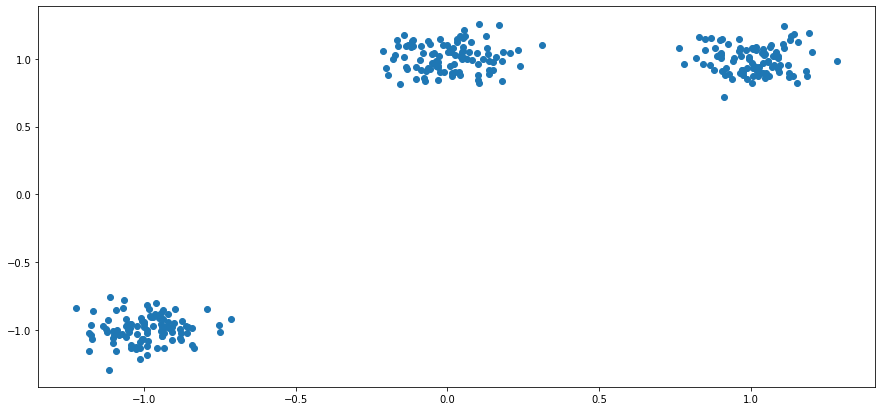

In [2]:
plt.figure(figsize=(15,7))
X, y = make_blobs(n_samples=300, centers=[[-1,-1],[1,1],[0,1]], n_features=2,cluster_std=0.1)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
from random import *
import random as rd 

X0=X[y==0]
X1=X[y==1]
X2=X[y==2]

mu0=choice(X0)
mu1=choice(X1)
mu2=choice(X2)

In [13]:
# function that calculate the Euclidean distance between two vectors

def euclidean_distance(v1, v2):
    d = 0.0
    for i in range(len(v2)):
        #print(v1,v2)
        d += (v1[i] - v2[i])**2
    return np.sqrt(d)

In [24]:
def K_means(X,initialization='None',verbose=0,norm='L2'):
    
    if initialization == 'random':
        mu0=np.array([rd.uniform(-1,1),rd.uniform(-1,1)])
        mu1=np.array([rd.uniform(-1,1),rd.uniform(-1,1)])
        mu2=np.array([rd.uniform(-1,1),rd.uniform(-1,1)])

    else:
        X0=X[y==0]
        X1=X[y==1]
        X2=X[y==2]
        mu0=choice(X0)
        mu1=choice(X1)
        mu2=choice(X2)
    i=0
    prec_cost=0
    cost=1
    while cost!=prec_cost:
        l0,l1,l2=[],[],[]
        prec_cost=cost
        cost=0
        for x in X:
            l0,l1,l2=list(l0),list(l1),list(l2)
            d0=euclidean_distance(mu0,x)
            d1=euclidean_distance(mu1,x)
            d2=euclidean_distance(mu2,x)
            if d0<d1 and d0<d2:
                l0.append(x)
                cost+=d0
            elif d1<d2:
                l1.append(x)
                cost+=d1
            else:
                l2.append(x)
                cost+=d2
            l0=np.array(l0)
            l1=np.array(l1)
            l2=np.array(l2)
        if verbose==1:
            print("Cost(t="+str(i)+") = ",cost)
        if len(l0)!=0:
            mu0=np.mean(l0,axis=0)
        else :
            mu0=[50,50]
        if len(l1)!=0:
            mu1=np.mean(l1,axis=0)
        else:
            mu1=[50,50]
        if len(l2)!=0:
            mu2=np.mean(l2,axis=0)
        else:
            mu2=[50,50]
        i+=1
    return np.array([np.array(l0),np.array(l1),np.array(l2),i-1])

[0.35295026 0.09781563] [0.04512109 0.89629847] [ 0.51494934 -0.45895748]


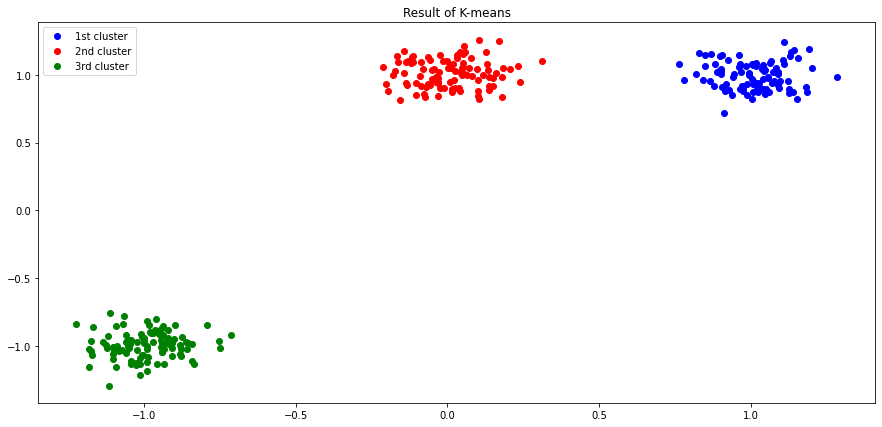

In [20]:
res=K_means(X,initialization='random')
plt.figure(figsize=(15,7))
plt.plot(res[0][:,0],res[0][:,1],marker='o',linestyle='None',color='b',label='1st cluster')
plt.plot(res[1][:,0],res[1][:,1],marker='o',linestyle='None',color='r',label='2nd cluster')
plt.plot(res[2][:,0],res[2][:,1],marker='o',linestyle='None',color='g',label='3rd cluster')
plt.legend()
plt.title("Result of K-means")
plt.show()

In [31]:
Ts1=[]
for n in range(1,51):
    print("Step "+str(n))
    Ts1.append(K_means(X,verbose=1)[3])
    print('------------------------------')


Step 1
Cost(t=0) =  53.57662045892976
Cost(t=1) =  38.69224205722371
Cost(t=2) =  38.69224205722371
------------------------------
Step 2
Cost(t=0) =  50.35771741273195
Cost(t=1) =  38.69224205722371
Cost(t=2) =  38.69224205722371
------------------------------
Step 3
Cost(t=0) =  59.649623540769085
Cost(t=1) =  38.69224205722371
Cost(t=2) =  38.69224205722371
------------------------------
Step 4
Cost(t=0) =  52.25752576419132
Cost(t=1) =  38.69224205722371
Cost(t=2) =  38.69224205722371
------------------------------
Step 5
Cost(t=0) =  50.58290185653364
Cost(t=1) =  38.69224205722371
Cost(t=2) =  38.69224205722371
------------------------------
Step 6
Cost(t=0) =  57.827375713042315
Cost(t=1) =  38.69224205722371
Cost(t=2) =  38.69224205722371
------------------------------
Step 7
Cost(t=0) =  66.74814800672503
Cost(t=1) =  38.69224205722371
Cost(t=2) =  38.69224205722371
------------------------------
Step 8
Cost(t=0) =  59.715965897247955
Cost(t=1) =  38.69224205722371
Cost(t=2) =

Text(0.5, 1.0, 'Number of iteration of K-means (std=0.1)')

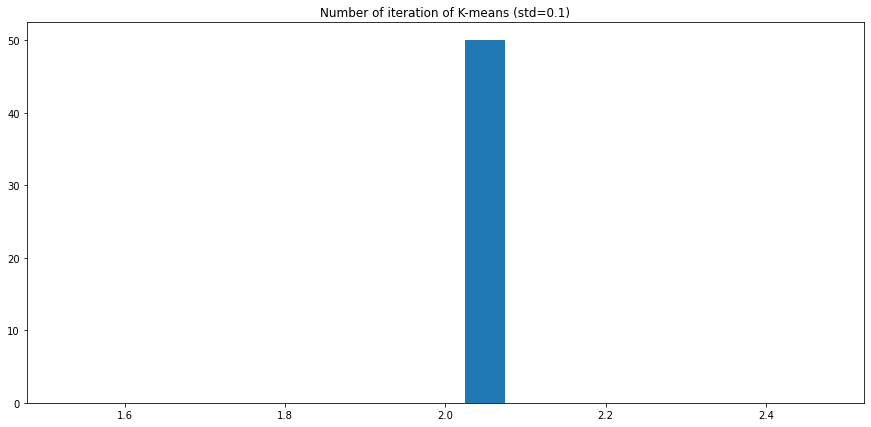

In [40]:
plt.figure(figsize=(15,7))
plt.hist(Ts1,histtype='bar',rwidth=0.5)
plt.title("Number of iteration of K-means (std=0.1)")

In [33]:
Ts2=[]
for n in range(1,51):
    print("Step "+str(n))
    Ts2.append(K_means(X,initialization='random',verbose=1)[3])
    print('------------------------------')


Step 1
Cost(t=0) =  297.4398090472625
Cost(t=1) =  114.87934239259384
Cost(t=2) =  114.87934239259384
------------------------------
Step 2
Cost(t=0) =  264.82554368239744
Cost(t=1) =  113.03921743206405
Cost(t=2) =  112.94958568054382
Cost(t=3) =  112.7859800436964
Cost(t=4) =  112.74798209536932
Cost(t=5) =  112.73011344590341
Cost(t=6) =  112.67201502129312
Cost(t=7) =  112.47402338558294
Cost(t=8) =  112.29751196470373
Cost(t=9) =  112.25829078818563
Cost(t=10) =  112.25684488344292
Cost(t=11) =  112.24983701340938
Cost(t=12) =  112.2398266775776
Cost(t=13) =  112.23266452620865
Cost(t=14) =  112.23266452620865
------------------------------
Step 3
Cost(t=0) =  193.8448275803174
Cost(t=1) =  85.71218316373935
Cost(t=2) =  39.927767753758665
Cost(t=3) =  38.69224205722371
Cost(t=4) =  38.69224205722371
------------------------------
Step 4
Cost(t=0) =  382.15599093385674
Cost(t=1) =  38.946991323173876
Cost(t=2) =  38.69224205722371
Cost(t=3) =  38.69224205722371
-------------------

Cost(t=1) =  114.87934239259384
Cost(t=2) =  114.87934239259384
------------------------------
Step 49
Cost(t=0) =  286.6345105442769
Cost(t=1) =  86.44850334025796
Cost(t=2) =  39.49480211863789
Cost(t=3) =  38.69224205722371
Cost(t=4) =  38.69224205722371
------------------------------
Step 50
Cost(t=0) =  194.83330413580143
Cost(t=1) =  114.87934239259384
Cost(t=2) =  114.87934239259384
------------------------------


Text(0.5, 1.0, 'Number of iteration of K-means (std=0.1 and random initialization)')

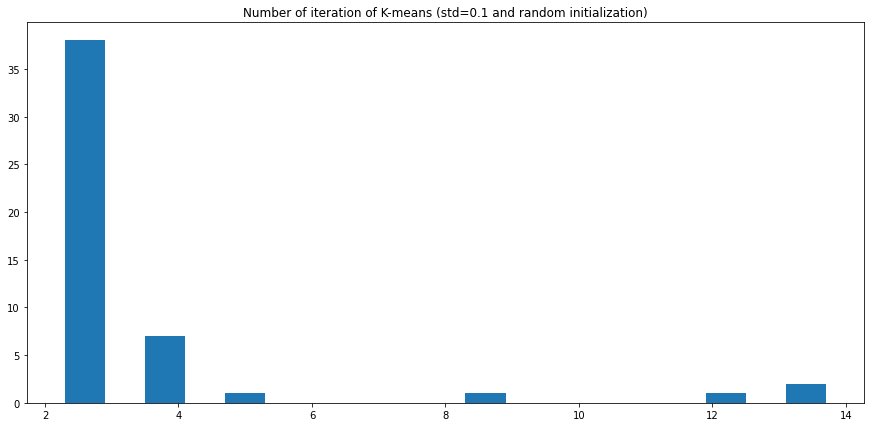

In [39]:
plt.figure(figsize=(15,7))
plt.hist(Ts2,histtype='bar',rwidth=0.5)
plt.title("Number of iteration of K-means (std=0.1 and random initialization)")

## Exercice 2 